In [1]:
#Impoting the library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
##Importing dataset

In [3]:
data=pd.read_excel('Flight _price.xlsx ')
pd.set_option('display.max_columns', None)

data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
#Checking for null value
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
#Droping the null values
data.dropna(inplace=True)

In [7]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# EDA

From description we can see that Date_of_Journey is a object data type,\ Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

In [8]:
# Extracting Day
data['Journey_day']=pd.to_datetime(data.Date_of_Journey,format='%d/%m/%Y').dt.day

In [9]:
# Extracting weekday
data['Journey_weekday']=pd.to_datetime(data.Date_of_Journey,format='%d/%m/%Y').dt.dayofweek

In [10]:
# Extracting Month
data['Journey_month']=pd.to_datetime(data.Date_of_Journey,format='%d/%m/%Y').dt.month

In [11]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_weekday,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,6,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,2,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,6,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,4,3


In [12]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [13]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_weekday,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,6,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,2,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,6,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,4,3


In [14]:
# Extracting Hour
data['Dep_hour']=pd.to_datetime(data.Dep_Time).dt.hour
# Extracting Minute
data['Dep_min']=pd.to_datetime(data.Dep_Time).dt.minute

In [15]:
#Now we can drop the Dep_Time column  as it is of no use.
data.drop(['Dep_Time'],axis=1,inplace=True)

In [16]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_weekday,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,6,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,2,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,6,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,4,3,16,50


In [17]:
# Time taken by plane to reach destination is called Duration

# Assigning and converting Duration column into list
duration =data["Duration"].tolist()

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration

    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [18]:
## Adding duration_hours and duration_mins list to train_data dataframe
data["Duration_hours"] = duration_hours
data["Duration_mins"] = duration_mins

In [19]:
#Now we can drop the Duration column  as it is of no use.
data.drop(["Duration"], axis = 1, inplace = True)

In [20]:
# Duration is the differnce betwwen Departure Time and Arrival time so drop the Arrival_Time
data.drop(['Arrival_Time'], axis=1,inplace=True)

In [21]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_weekday,Journey_month,Dep_hour,Dep_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,6,3,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,2,5,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,6,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,6,5,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,4,3,16,50,4,45


# Handling Categorical Data

In [22]:
data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='count'>

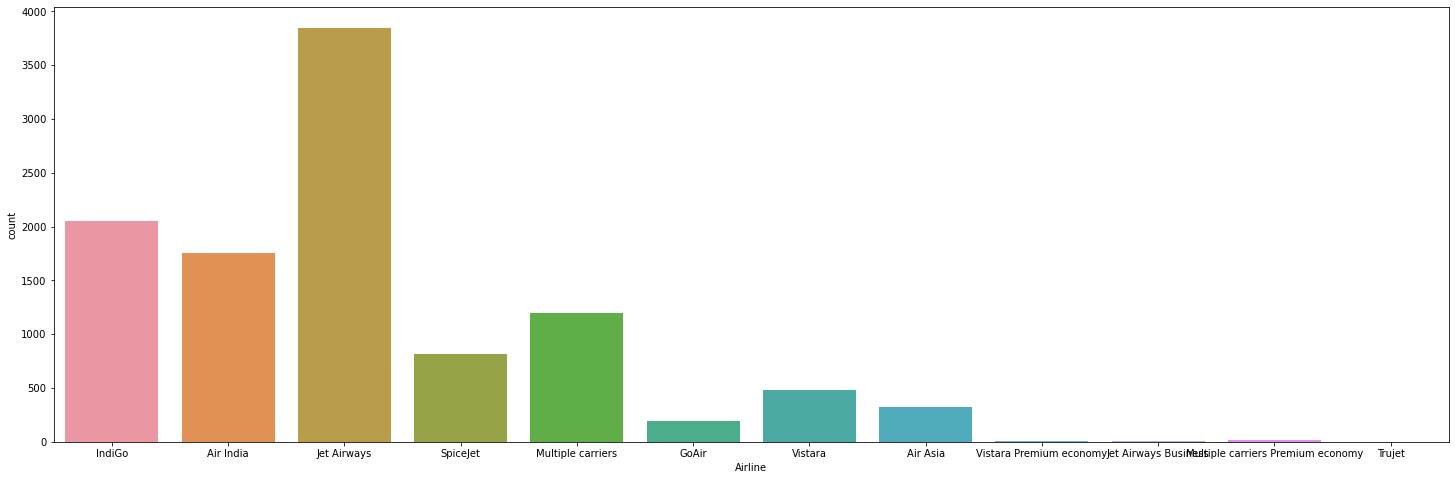

In [27]:
plt.figure(figsize=(25,8))
sns.countplot(data["Airline"])

<AxesSubplot:xlabel='Price', ylabel='Airline'>

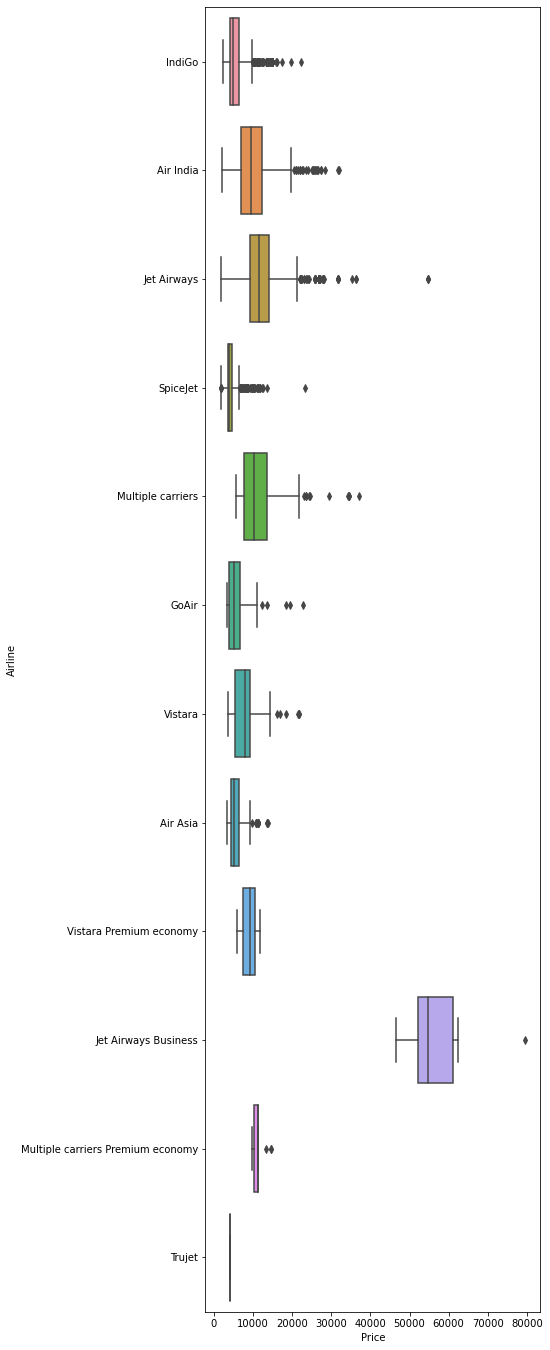

In [30]:
# Airline vs Price
plt.figure(figsize=(6,24))
sns.boxplot(y=data.Airline,x=data.Price)

From graph we can see that Jet Airways Business have the highest Price.
Apart from  all the Airline almost are having similar Price

In [31]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

airline = pd.get_dummies(data[["Airline"]], drop_first= True)

airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [32]:
data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='count'>

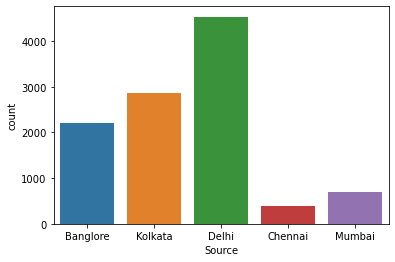

In [33]:
sns.countplot(data["Source"])

Highest no of people tavell from Delhi

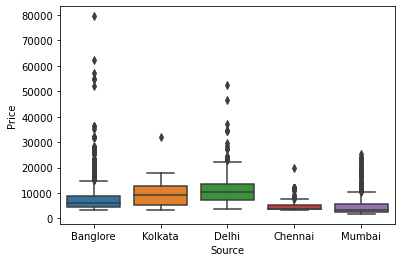

In [34]:
#Source vs Price
sns.boxplot(x='Source', y="Price",data=data)
plt.show()

All the Source almost are having similar Price

In [35]:
Source = data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [36]:
data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='count'>

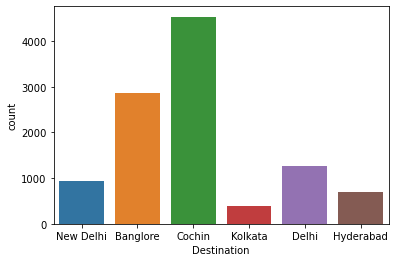

In [37]:
sns.countplot(data["Destination"])

In [38]:
Destination = data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [39]:
data["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [40]:
#Since Additional_Info contain 80% No info so we can drop it
data.drop(['Additional_Info'],axis=1, inplace=True)

In [41]:
# Route and Total_Stops are related to each other so we drop it
data.drop(['Route'],axis=1, inplace=True)

In [42]:
data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [43]:
#Values are assigned with corresponding keys
data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [45]:
# Concatenate dataframe train_data + Airline + Source + Destination

data1 = pd.concat([data, airline, Source, Destination], axis = 1)

In [47]:
data1.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_weekday,Journey_month,Dep_hour,Dep_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,6,3,22,20,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,2,5,5,50,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,6,9,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,6,5,18,5,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,4,3,16,50,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [48]:
data1.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [49]:
data1.head()

,Total_Stops,Price,Journey_day,Journey_weekday,Journey_month,Dep_hour,Dep_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,6,3,22,20,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,2,5,5,50,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,6,9,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,6,5,18,5,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,4,3,16,50,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [50]:
data1.shape

(10682, 29)

In [52]:
X=data1.drop('Price',axis=1)
y=data1['Price']

In [53]:
X.shape,   y.shape

((10682, 28), (10682,))

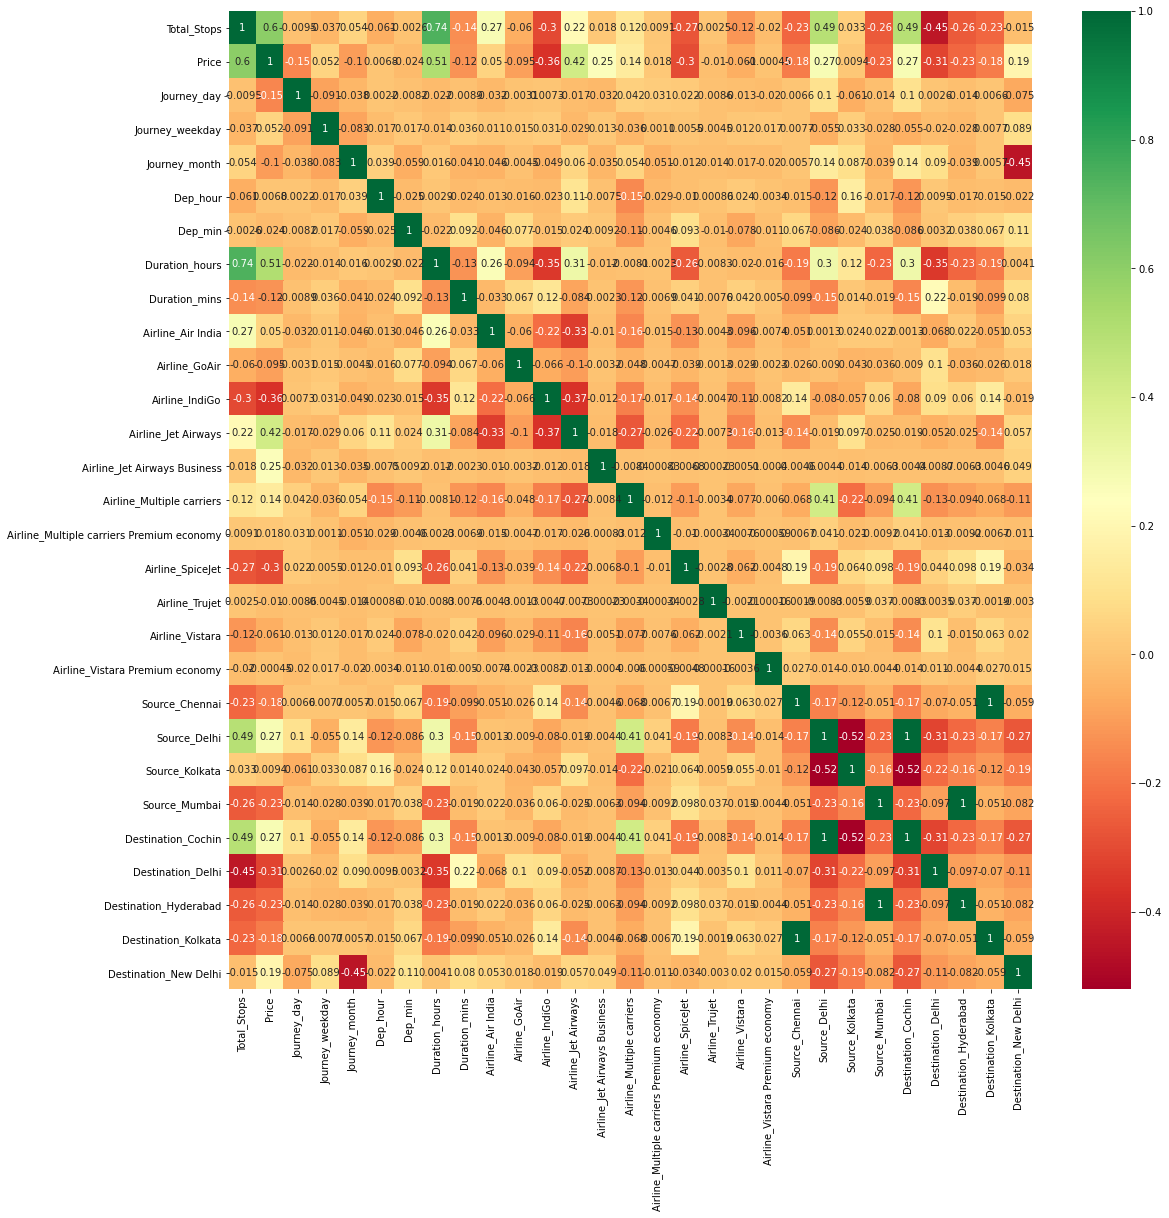

In [61]:
plt.figure(figsize = (18,18))
sns.heatmap(data1.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [56]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

In [59]:
print(model.feature_importances_)

[2.13881307e-01 1.15613028e-01 2.79122217e-02 5.19235423e-02
 4.08281298e-02 3.14757308e-02 1.50318199e-01 2.77986828e-02
 9.65605281e-03 2.04900054e-03 1.82798292e-02 1.35090566e-01
 6.76175627e-02 2.05046943e-02 8.92882206e-04 2.92592966e-03
 1.10240434e-04 5.09501792e-03 1.21498941e-04 6.14134206e-04
 1.15681630e-02 4.07009869e-03 7.38255108e-03 8.34186608e-03
 1.40256450e-02 6.40588493e-03 5.89862743e-04 2.49076770e-02]


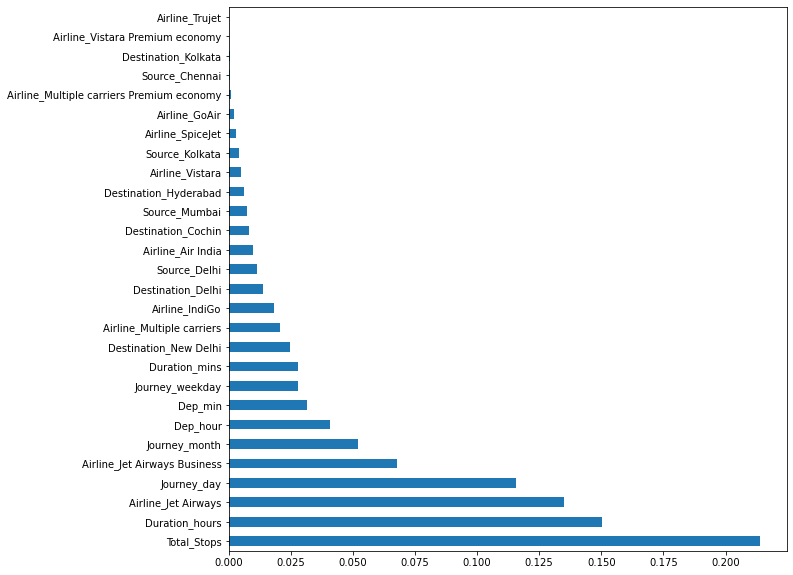

In [65]:
plt.figure(figsize = (10,10))
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(28).plot(kind='barh')
plt.show()

# Fitting model using Random Forest

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 112)

In [68]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()

In [69]:
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [70]:
y_pred=reg_rf.predict(X_test)

In [71]:
reg_rf.score(X_train, y_train)

0.9552659612749705

In [72]:
reg_rf.score(X_test, y_test)

0.8146877348902334

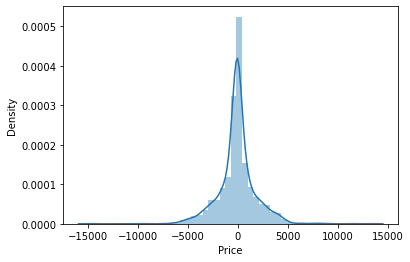

In [73]:
sns.distplot(y_test-y_pred)
plt.show()

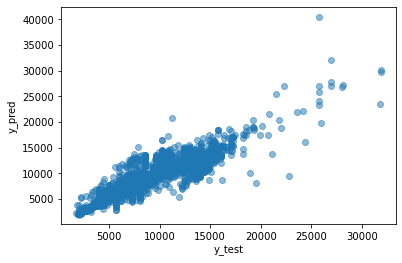

In [74]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [75]:
from sklearn import metrics

In [76]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1197.50641498729
MSE: 3427105.323478257
RMSE: 1851.2442635909117


In [77]:
metrics.r2_score(y_test, y_pred)


0.8146877348902334